# Используем набор примеров fashion-MNIST

In [1]:
# libs
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import fashion_mnist
from keras.metrics import Recall, Precision

import matplotlib.pyplot as plt

(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


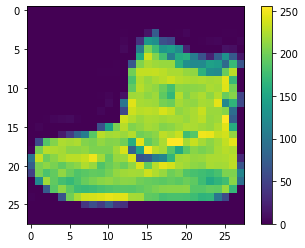

In [2]:
# load data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# view dataset info
print(train_images.shape) # dataset size

labels = np.unique(train_labels)
print(labels) # classes

# content example
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [3]:
# pixel value normalization
train_images = train_images / 255 - 1
test_images = test_images / 255 - 1

# flatten images
train_images_fl = train_images.reshape((-1, 784))
test_images_fl = test_images.reshape((-1, 784))

# 1. Опишите - какой результата получен в нейросети в зависимости от: 
- числа нейронов в слое (для 2-хслойной сети),
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
- фиксируйте для тренировочного и тестового набора метрики accuracy.

## Двухслойная модель с разным числом нейронов

1 neurons accurasy:
	Train: 0.10000000149011612
	Test: 0.10000000149011612
2 neurons accurasy:
	Train: 0.10000000149011612
	Test: 0.10000000149011612
4 neurons accurasy:
	Train: 0.3930000066757202
	Test: 0.3928999900817871
8 neurons accurasy:
	Train: 0.7642499804496765
	Test: 0.7559000253677368
16 neurons accurasy:
	Train: 0.8397499918937683
	Test: 0.8213000297546387
32 neurons accurasy:
	Train: 0.8557833433151245
	Test: 0.8367999792098999
64 neurons accurasy:
	Train: 0.8603500127792358
	Test: 0.8418999910354614
128 neurons accurasy:
	Train: 0.875333309173584
	Test: 0.858299970626831
256 neurons accurasy:
	Train: 0.8684333562850952
	Test: 0.8528000116348267


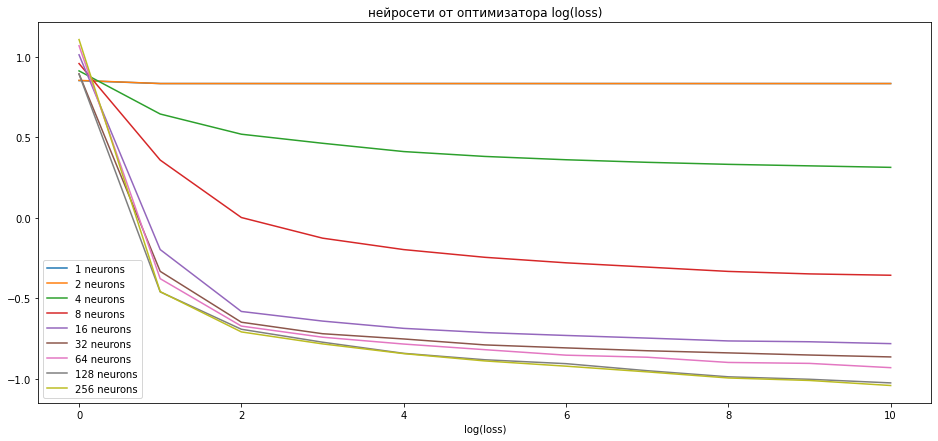

In [4]:
epochs = 10
epoch = np.arange(epochs+1)

plt.figure(figsize=(16,7))

# Models
for i in (1, 2, 4, 8, 16, 32, 64, 128, 256):

  # build
  two_layers_model = Sequential([
      Dense(units=i, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
  ])

  # compile
  two_layers_model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  # calc errors
  hh0_train = two_layers_model.evaluate(train_images_fl, to_categorical(train_labels), verbose=0)

  # fitting
  hh_train = two_layers_model.fit(
      train_images_fl,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  hh1_train = two_layers_model.evaluate(train_images_fl, to_categorical(train_labels), verbose=0)
  hh_test = two_layers_model.evaluate(test_images_fl, to_categorical(test_labels), verbose=0)

  print(f"{i} neurons accurasy:")
  print(f"\tTrain: {hh1_train[1]}")
  print(f"\tTest: {hh_test[1]}")

  plt.plot(epoch, np.log([hh0_train[0]] + hh_train.history['loss']), label=f'{i} neurons')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

## Вывод:
- Заметно, что эпохи не влияют на точность при 1 или 2 нейронах
- С 4 неронами эпохи начинают влиять на точность
- 128 и 256 - разница в точности минимальное
- 64 и 128 нейрона показывают максимальную точность на Test

## Модели различающиеся числом слоев (2, 3, 5, 10).

In [5]:
units = 64

two_layers_model = Sequential([
      Dense(units=units, activation='relu', input_shape=(784,)), 
      Dense(units=10, activation='softmax')
  ]) # 2 layers

three_layers_model = Sequential([
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
  ]) # 3 layers

five_layers_model = Sequential([
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
  ]) # 5 layers

ten_layers_model = Sequential([
                                
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),

      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),

      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')

  ]) # 10 layers

2 layers, accurasy:
	Train: 0.8582000136375427
	Test: 0.843500018119812
3 layers, accurasy:
	Train: 0.8722333312034607
	Test: 0.8536999821662903
5 layers, accurasy:
	Train: 0.8471666574478149
	Test: 0.8264999985694885
10 layers, accurasy:
	Train: 0.8494666814804077
	Test: 0.8321999907493591


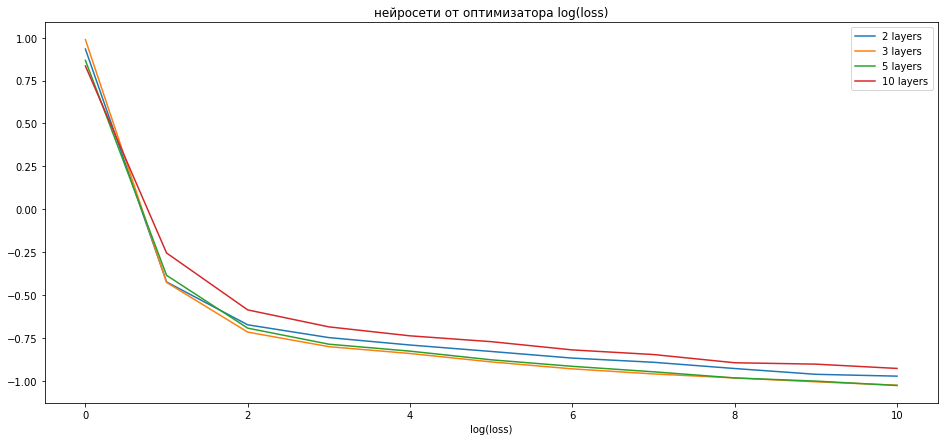

In [6]:
plt.figure(figsize=(16,7))

# Models
for num, nlm in {2: two_layers_model, 3: three_layers_model, 5: five_layers_model, 10: ten_layers_model}.items():

  # compile
  nlm.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  # calc errors
  hh0_train = nlm.evaluate(train_images_fl, to_categorical(train_labels), verbose=0)

  # fitting
  hh_train = nlm.fit(
      train_images_fl,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  hh1_train = nlm.evaluate(train_images_fl, to_categorical(train_labels), verbose=0)
  hh_test = nlm.evaluate(test_images_fl, to_categorical(test_labels), verbose=0)

  print(f"{num} layers, accurasy:")
  print(f"\tTrain: {hh1_train[1]}")
  print(f"\tTest: {hh_test[1]}")

  plt.plot(epoch, np.log([hh0_train[0]] + hh_train.history['loss']), label=f'{num} layers')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

## Вывод:
- Заметно, что при 64 нейронах в каждом слое, 3 слоя имеют наилучший результат на Test

# 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

sgd optimizer, accurasy:
	Train: 0.8569666743278503
	Test: 0.8367000222206116
adam optimizer, accurasy:
	Train: 0.8655666708946228
	Test: 0.8481000065803528
nadam optimizer, accurasy:
	Train: 0.8793500065803528
	Test: 0.8647000193595886
rmsprop optimizer, accurasy:
	Train: 0.8693000078201294
	Test: 0.8500999808311462


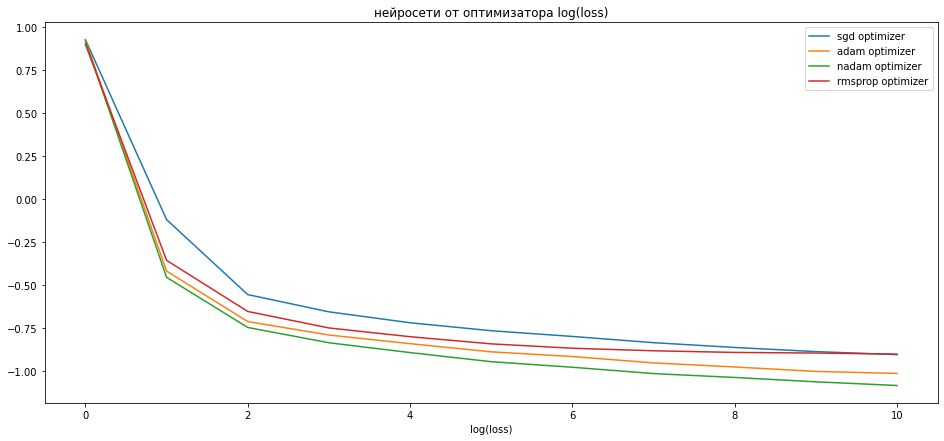

In [7]:
plt.figure(figsize=(16,7))

# Models
for opt in ('sgd', 'adam', 'nadam', 'rmsprop'):

  # build
  three_layers_model = Sequential([
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
  ])

  # compile
  three_layers_model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  # calc errors
  hh0_train = three_layers_model.evaluate(train_images_fl, to_categorical(train_labels), verbose=0)

  # fitting
  hh_train = three_layers_model.fit(
      train_images_fl,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  hh1_train = three_layers_model.evaluate(train_images_fl, to_categorical(train_labels), verbose=0)
  hh_test = three_layers_model.evaluate(test_images_fl, to_categorical(test_labels), verbose=0)

  print(f"{opt} optimizer, accurasy:")
  print(f"\tTrain: {hh1_train[1]}")
  print(f"\tTest: {hh_test[1]}")

  plt.plot(epoch, np.log([hh0_train[0]] + hh_train.history['loss']), label=f'{opt} optimizer')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

## Вывод:
- Заметно что лучший результат показывает оптимизатор NAdam
- rmsprop демострирует ухудшение результатов со временем

# 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

## Ответ:
На точность нейросетки повлияло: 
- число нейронов = 64 
- число слоев = 3
- оптимизатор - NAdam

# 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [8]:
best_model = Sequential([
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=units, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
])

best_model.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

best_model.fit(train_images_fl,
               to_categorical(train_labels),
               epochs=10,
               batch_size=32, 
               validation_split=0.2,
               verbose=0)

best_model.evaluate(test_images_fl, to_categorical(test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.4291 - accuracy: 0.8449


[0.42909932136535645, 0.8449000120162964]

In [9]:
predict = best_model.predict(test_images_fl)
test_labels_pred = np.argmax(predict, axis=1)

print(test_labels_pred[:10])
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [10]:
df = pd.DataFrame(columns=['recall', 'preccision'], index=range(10))

for i in labels:
  recall = Recall()
  recall.update_state(y_true=(test_labels == i), 
                      y_pred=(test_labels_pred == i))
  df.loc[i, 'recall'] = recall.result().numpy()

  precision = Precision()
  precision.update_state(y_true=(test_labels == i), 
                         y_pred=(test_labels_pred == i))
  df.loc[i, 'preccision'] = precision.result().numpy()

df.index = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
df

,recall,preccision
T-shirt/top,0.771,0.836226
Trouser,0.938,0.994698
Pullover,0.725,0.776231
Dress,0.91,0.77381
Coat,0.867,0.689737
Sandal,0.966,0.884615
Shirt,0.477,0.739535
Sneaker,0.889,0.935789
Bag,0.981,0.879821
Ankle boot,0.925,0.957557


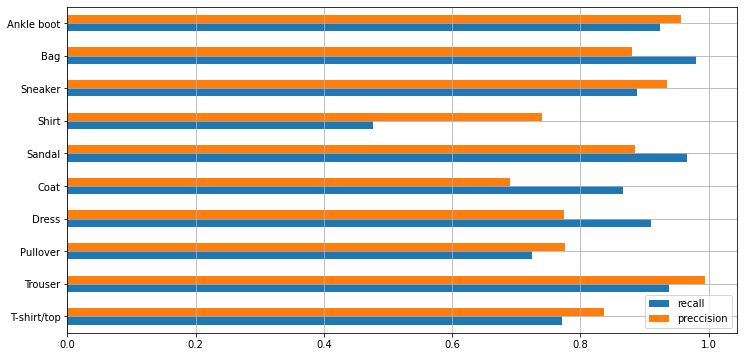

In [16]:
df.plot(kind='barh', figsize=(12, 6), grid=True)
plt.show()

* Поработайте с документацией Keras. Найдите полезные команды не разобранные на уроке.